<a href="https://colab.research.google.com/github/sagar3992/AI_MachineLearning/blob/master/Gradient_and_Cost_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def compute_cost(x, y, params):
    "Compute linear regression cost (mean_square) - use something like this for computing the cost using tanh and sigmoid"
    num_samples = len(y)
    cost_sum = 0.0
    #print(x.shape, y.shape)
    y_hat = np.dot( x, params)
    cost_sum = (y_hat - y) ** 2
    cost = np.sum(cost_sum) / (num_samples * 2.0)
    #print("Cost = ", cost)
    return cost

In [0]:
import numpy as np
"Function of Stochaistic GD"
def my_SGD(x, y, params, itr, lr, cost_history, params_history):
    sample_size= len(y)
    m= np.random.randint(0,sample_size)
    cost = compute_cost(np.append([[1.0]]*(sample_size-m),x[m:], axis=1),y[m:],params)
    cost_history.append(cost)
    for a,b in zip(x[m:],y[m:]):
        xt=  np.append([1.0],a)
        y_pred = np.dot(params,xt)
        loss = b - y_pred
        gradient = xt * loss
        params = params + (lr * gradient / sample_size)
    if itr is not 0:
        my_SGD(x,y,params,itr-1,lr,cost_history,params_history)
    
    return params, cost_history

In [0]:
import numpy as np
"Function of GD"
def my_GD(x, y, params, itr, lr, cost_history, params_history):
    sample_size= len(y)
    cost = compute_cost(np.append([[1.0]]*(sample_size),x, axis=1),y,params)
    cost_history.append(cost)
    xt= np.append([[1.0]]*sample_size, x, axis=1)
    y_pred = np.dot(xt, params)
    loss = np.subtract(y, y_pred)
    gradient = np.dot(np.transpose(xt), loss)
    params = params + (lr * gradient / sample_size)
    
    if itr is not 0:
        my_GD(x,y,params,itr-1,lr,cost_history,params_history)

    return params, cost_history

In [0]:
"Implemenation of SGD and GD"
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,0,0,1])
params=np.array([1,20,20])
max_iter, alpha = 800, 1
a,b=my_SGD(x, y, params, max_iter, alpha, [], []) # SGD in a,b
c,d=my_GD(x, y, params, max_iter, alpha, [], []) # GD in c,d

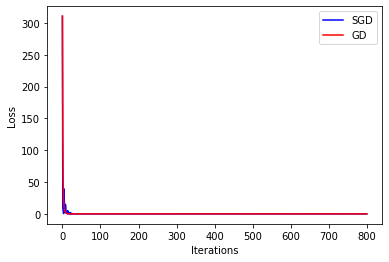

Minimum cost with stochastic GD: 0.0007830060940535055
Minimum cost with GD : 0.03125


In [82]:
"Plotting the cost history over iterations"
import matplotlib.pyplot as plt
#plt.plot( np.array(]).reshape(2492) , [row[2] for row in b], '-b')
#b=np.array(b)
#print(b.shape)
plt.figure()
plt.plot([x for x in range(0,max_iter+1)], b, 'b', label='SGD')
plt.plot([x for x in range(0,max_iter+1)], d, 'r', label='GD')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
print(f'Minimum cost with stochastic GD: {b[max_iter-1]}')
print(f'Minimum cost with GD : {d[max_iter-1]}')